## Daily birth forecasting

In [1]:
# import libraries
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt

In [4]:
# reading dataset
df = pd.read_csv("daily-total-female-births-CA.csv", parse_dates=['date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y'] # required to be fed into dacebook prophet model estimator
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 1.0, 'Daily Female Births in 1959')

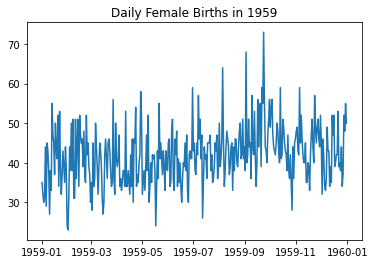

In [5]:
# plotting ds vs y
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959')

In [6]:
# adding seasonality effects to the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False, 
                          changepoint_range=0.9, 
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df)
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


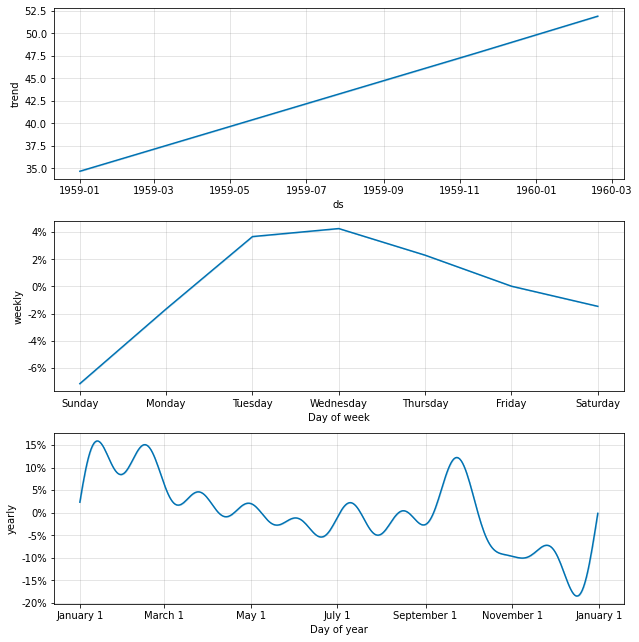

In [9]:
# visualizing seasonality effects
warnings.simplefilter("ignore")
m.plot_components(forecast)
plt.show()

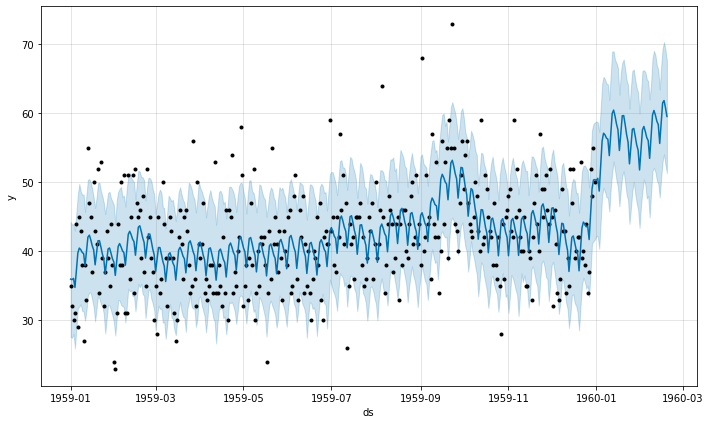

In [11]:
# visualizing predictions made by prophet for daily birth prediction
m.plot(forecast)
plt.show()